Final Parameters (Theta): [2079.8099444  644.7349535]


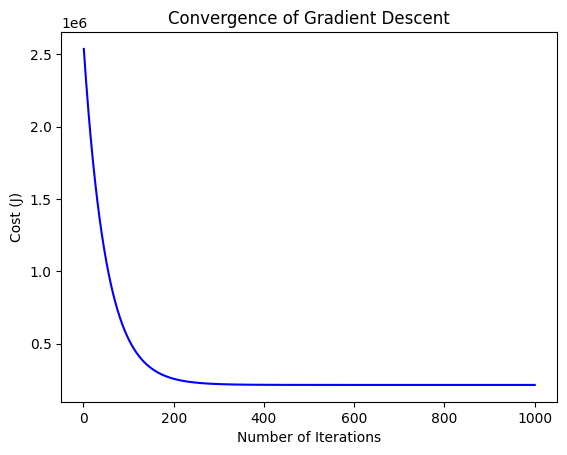

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('kc_house_data.csv')

# Extracting features and target variable
X = data['price'].values.reshape(-1, 1)  
y = data['sqft_living'].values                   

# Feature scaling
X = (X - np.mean(X)) / np.std(X)

# Adding bias term
X_bias = np.c_[np.ones(X.shape[0]), X]

# Initialize theta parameters
theta = np.zeros(X_bias.shape[1])

# Gradient Descent function
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = (1/m) * np.dot(X.T, errors)
        theta -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = np.dot(X, theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# Parameters
learning_rate = 0.01
num_iterations = 1000

# Perform Gradient Descent
theta_final, cost_history = gradient_descent(X_bias, y, theta, learning_rate, num_iterations)

# Print final parameters
print("Final Parameters (Theta):", theta_final)

# Plot the convergence of Gradient Descent
plt.plot(range(1, num_iterations + 1), cost_history, color='blue')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')
plt.show()
